# Определение стоимости автомобилей

# Цель:

Построение модели машинного обучения для определения стоимости автомобилей сервиса продаж

# Задачи:

1) Обучение разных моделей машинного обучения. Для каждой модели нужно выбрать разные гиперпараметры.

2) Анализ времени обучения моделей, времени предсказания и качества моделей.

3) Выбор наилучшей модели по результатам проверки ее работы на тестовой выборке в соответствии с критериями заказчика, которому важны:
- качество предсказания;
- скорость предсказания;
- время обучения.

# Описание данных

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В распоряжении находятся исторические данные: технические характеристики, комплектации и цены автомобилей.

Признаки датасета:
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

Целевой признак:
* Price — цена (евро)

# Ход работы

В ходе работы сначала будет проведен общий обзор данных, содержащихся в датасете. Далее будет проведена предобработка данных и их анализ для выявления ошибок, аномалий, пропусков. Пропущенные значения будут заполнены, также будут обработаны аномалии и выбросы в признаках. Неинформативные признаки будут удалены. Таким образом, данные будут подготовлены для машинного обучения.

Следующий этап работы - выбор моделей, в частности, будут использованы модели бустинга. Для настройки гиперпараметров моделей будут использоваться пайплайны. Каждая модель с наилучшими гиперпараметрами будет оценена по времени обучения и метрикам качества на кросс-валидации. Затем наилучшие модели будут применены к тестовой выборке, проанализированы результаты, а также определена лучшая модель в соответствии с требованиям заказчика.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li>
        <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
        <li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li>
        <li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span></li>
        <li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ моделей</a></span></li>
        <li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li>
    </ul>
</div>

## Загрузка и обзор данных

In [1]:
# Импортируем нужные библиотеки и модули

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import os
import phik
from time import time
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder

from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 180)

In [2]:
# Загрузка данных

pth1 = r'C:\Users\ksa18\Dropbox\My files\ML_models\car_prices_api\autos.csv'
pth2 = r'C:\Users\ksa18\Downloads\autos.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Ошибка')

In [3]:
# Вывод первых 5 строк датасета

df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
# Вывод общей информации

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
<strong>Вывод:
</strong>

В датасете 354369 строк и 16 столбцов. В некоторых столбцах присутствуют пропуски. Также названия колонок должны быть приведены к "змеиному" стилю.

## Предобработка данных

Выявим явные дубликаты.

In [5]:
df.duplicated().sum()

np.int64(4)

In [6]:
# Удаление дубликатов и проверка успешности удаления

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

Рассмотрим данные в столбцах DateCrawled и DateCreated.

In [7]:
df['DateCrawled'].sort_values()

329497    2016-03-05 14:06:22
220583    2016-03-05 14:06:23
176823    2016-03-05 14:06:24
324763    2016-03-05 14:06:24
99885     2016-03-05 14:06:24
                 ...         
204218    2016-04-07 14:36:53
53739     2016-04-07 14:36:54
301030    2016-04-07 14:36:55
339649    2016-04-07 14:36:56
90713     2016-04-07 14:36:58
Name: DateCrawled, Length: 354365, dtype: object

In [8]:
df['DateCreated'].sort_values()

61207     2014-03-10 00:00:00
4001      2015-03-20 00:00:00
342275    2015-06-18 00:00:00
86601     2015-08-07 00:00:00
175103    2015-08-10 00:00:00
                 ...         
184411    2016-04-07 00:00:00
262340    2016-04-07 00:00:00
214462    2016-04-07 00:00:00
241969    2016-04-07 00:00:00
260600    2016-04-07 00:00:00
Name: DateCreated, Length: 354365, dtype: object

Выведем общую стат. информацию о количественных признаках датасета.

In [9]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Видно, что в датасете присутствуют аномальные значения, не соответствующие реальным (например, в признаках 'RegistrationYear'	и 'Power'). Признак NumberOfPictures полностью состоит из нулей.

Также в датасете присутствуют неинформативные признаки, которыми нельзя объяснить целевой признак. К таким признакам можно отнести DateCrawled, DateCreated,	RegistrationMonth, NumberOfPictures, PostalCode и LastSeen, которые не влияют на стоимость авто. Удалим эти признаки.

In [10]:
df = df.drop(['DateCrawled', 'DateCreated', 'RegistrationMonth', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)

Приведем названия столбцов к "змеиному типу".

In [11]:
# Понижение регистра и переименование столбцов

df.columns = df.columns.str.lower()

df.rename(columns={'vehicletype': 'vehicle_type', 'registrationyear': 'registration_year',
                   'fueltype': 'fuel_type', }, inplace=True)

Далее поработаем с пропусками в признаках.

In [12]:
# Посчитаем долю пропусков в столбцах в процентах, создадаим датафрейм

pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
price,0.000000
vehicle_type,10.600000
registration_year,0.000000
gearbox,5.600000
power,0.000000
model,5.600000
kilometer,0.000000
fuel_type,9.300000
brand,0.000000
repaired,20.100000


В большинстве признаков пропуски составляют довольно значимую долю (около 10 - 20 %), поэтому их удаление нецелесообразно. Произведем заполнение пропусков - в случае категориальных признаков заполним пропуски заглушкой.

**Категориальные признаки**

Рассмотрим уникальные значения и пропуски.

In [13]:
df['vehicle_type'].value_counts()

vehicle_type
sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: count, dtype: int64

In [14]:
df['gearbox'].value_counts()

gearbox
manual    268249
auto       66283
Name: count, dtype: int64

In [15]:
df['model'].value_counts()

model
golf                  29232
other                 24420
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: count, Length: 250, dtype: int64

In [16]:
df['fuel_type'].value_counts()

fuel_type
petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: count, dtype: int64

In [17]:
df['repaired'].value_counts()

repaired
no     247158
yes     36053
Name: count, dtype: int64

Пропуски в этих столбцах заменим заглушкой.

In [18]:
df['vehicle_type'] = df['vehicle_type'].fillna('unknown')
df['gearbox'] = df['gearbox'].fillna('unknown')
df['model'] = df['model'].fillna('unknown')
df['fuel_type'] = df['fuel_type'].fillna('unknown')
df['repaired'] = df['repaired'].fillna('unknown')

**Количественные признаки**

Рассмотрим аномалии в этих признаках

**1. Признак 'registration_year'**

In [19]:
df['registration_year'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

В признаке 'registration_year' присутствуют аномальные значения. Рассчитаем долю таких значений. Учитывая, что невозможно обратиться к заказчику для прояснения ситуации, установим границы времени производства автомобилей самостоятельно - не новее 2016 года (учитывая, что дата выгрузки анкет об авто датируется 2016 годом) и не старше 1950 года (принимая во внимание, что сервис по продаже автомобилей может продавать и раритетные авто).

In [20]:
# Расчет процентного соотношения

len(df.loc[(df['registration_year'] > 2016) | (df['registration_year'] < 1950)]) / len(df) * 100

4.169712020092278

Доля таких авто довольно мала (около 4.2 %), поэтому удалим из датасета эти строки.

In [21]:
df = df[(df['registration_year'] >= 1950) & (df['registration_year'] <= 2016)]

**2. Признак 'power'**

Выведем все уникальные значения этого признака.

In [22]:
df['power'].sort_values().unique()

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

Построим для него гистограмму и диаграмму "ящик с усами".

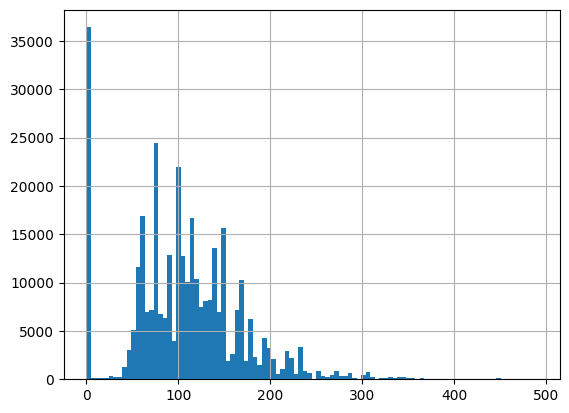

In [23]:
df['power'][df['power'] < 500].hist(bins=100);

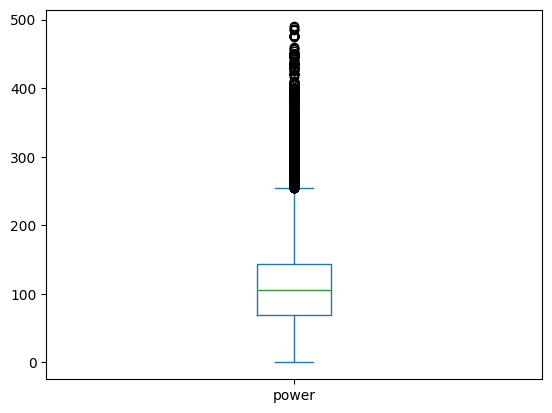

In [24]:
df['power'][df['power'] < 500].plot.box();

Видно, что присутствуют аномальные значения - автомобили с нулем л.с. и нереалистично мощные автомобили. Проверим, какую долю в данных датасета составляют такие автомобили.

In [25]:
# Отображение результата в процентах

display(len(df[df['power'] == 0]) / len(df) * 100)
display(len(df[(df['power'] == 0) | (df['power'] > 500)]) / len(df) * 100)

10.697048490969967

10.820138461493158

Предположим, что авто с 0 л.с. могут быть без двигателя. Проверим, были ли такие машины в ремонте и какой тип топлива для них нужен.

In [26]:
display(df[df['power'] == 0]['repaired'].value_counts())
display(df[df['power'] == 0]['fuel_type'].value_counts())

repaired
unknown    19278
no         12604
yes         4444
Name: count, dtype: int64

fuel_type
petrol      18143
unknown     10354
gasoline     7292
lpg           357
other          94
cng            52
hybrid         22
electric       12
Name: count, dtype: int64

Учитывая, что много машин, где указаны 0 л.с., не были в ремонте, а также для таких машин чаще используют бензин, предположим, что значение 0 л.с. - аномальное значение. 

Поскольку известно, что в мире существовали и существуют маломощные автомобили мощностью в том числе и около 5 л.с., удалим лишь те строки, в которых мощность равна 0, и удалим строки с выбросами, соответствующими мощности авто более 500 л.с., поскольку слишком большая мощность авто (несколько тысяч л.с.), встрачающаяся в датасете, нереалистична. Более того, сервис не продает гоночные и уникальные авто, поскольку цена таковых сильно бы превышала максимальную цену (20000 евро), встречающуюся в датасете.

In [27]:
df = df[(df['power'] != 0) & (df['power'] < 500)]

**3. Признак 'kilometer'**

In [28]:
df['kilometer'].value_counts()

kilometer
150000    201478
125000     32254
100000     13025
90000      10438
80000       9138
70000       7881
60000       6882
50000       5707
40000       4553
30000       3973
20000       3349
5000        3183
10000        949
Name: count, dtype: int64

Аномалий не наблюдается.

**4. Целевой признак 'price'**

In [29]:
df['price'].value_counts()

price
0        6387
500      4470
1500     4430
1200     3736
2500     3705
         ... 
976         1
408         1
4159        1
17830       1
2085        1
Name: count, Length: 3591, dtype: int64

In [30]:
df['price'].sort_values().unique()[:150]

array([  0,   1,   2,   3,   5,   9,  10,  11,  12,  13,  15,  16,  17,
        19,  20,  24,  25,  26,  29,  30,  35,  38,  39,  40,  45,  47,
        49,  50,  55,  60,  65,  66,  69,  70,  75,  77,  79,  80,  85,
        89,  90,  95,  98,  99, 100, 101, 105, 108, 110, 111, 112, 115,
       117, 119, 120, 122, 123, 125, 126, 128, 129, 130, 132, 133, 135,
       139, 140, 142, 145, 149, 150, 155, 156, 157, 159, 160, 162, 165,
       166, 169, 170, 173, 175, 179, 180, 181, 185, 188, 189, 190, 192,
       193, 195, 196, 198, 199, 200, 202, 205, 209, 210, 211, 215, 217,
       219, 220, 222, 224, 225, 229, 230, 233, 235, 236, 240, 243, 245,
       248, 249, 250, 251, 252, 253, 255, 259, 260, 261, 263, 265, 266,
       269, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 284, 285,
       289, 290, 295, 298, 299, 300, 301])

Имеются авто с нулевой ценой, что странно с точки зрения бизнеса сервиса, а также существуют машины с очень низкой стоимостью. Ограничим минимальную цену авто стами евро. Посчитаем процент таких автомобилей.

In [31]:
len(df[df['price'] < 100]) / len(df) * 100

2.4985964796406988

Удалим строки с ценой менее 100 евро.

In [32]:
df = df[df['price'] >= 100]

**Итоговая проверка**

Проверим успешность заполнения пропусков и общую информацию о получившемся датасете

In [33]:
# Вывод количества пропусков в признаках

df.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64

In [34]:
# Вывод общей информации

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295244 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              295244 non-null  int64 
 1   vehicle_type       295244 non-null  object
 2   registration_year  295244 non-null  int64 
 3   gearbox            295244 non-null  object
 4   power              295244 non-null  int64 
 5   model              295244 non-null  object
 6   kilometer          295244 non-null  int64 
 7   fuel_type          295244 non-null  object
 8   brand              295244 non-null  object
 9   repaired           295244 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.8+ MB


<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
<strong>Вывод:
</strong> 
    В разделе была проведена предобработка данных - определены признаки, которые совершенно неинформативны для целевого признака (они были удалены), названия столбцов приведены к "змеиному" стилю, заполнены пропуски в признаках, а также обработаны аномальные значения в количественных признаках.

## Анализ данных

**Признаки, имеющие непрерывную "природу"**

In [35]:
# Напишем функцию для построения графиков количественных признаков, распределенных непрерывно

def plot_numbers(df, labels_dict, nrows=1, ncols=3, figsize=(15, 4)):
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()
    
    for i, col in enumerate(labels_dict):
        df[col].plot.hist(bins=50, ax=axes[i])
        
        # Получаем подписи из словаря
        title, xlabel, ylabel = labels_dict.get(col)
        
        axes[i].set_title(title)
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
    
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False) 
    plt.tight_layout() 
    plt.show()

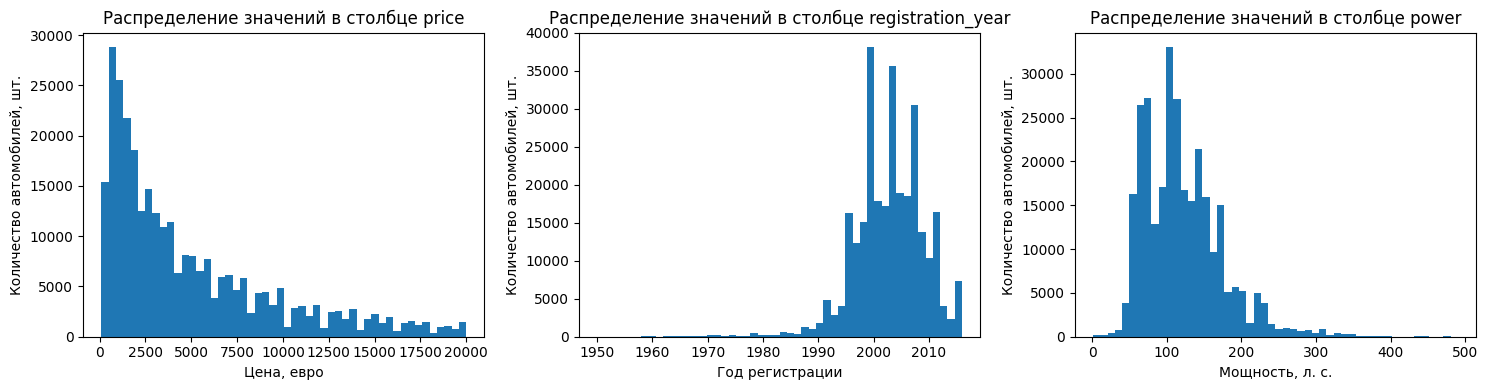

In [36]:
# Оформим название графиков и подписи к осям в словарь

labels_dict1 = {
    'price': ['Распределение значений в столбце price', 'Цена, евро', 'Количество автомобилей, шт.'],
    'registration_year': ['Распределение значений в столбце registration_year',
                          'Год регистрации', 'Количество автомобилей, шт.'],
    'power': ['Распределение значений в столбце power', 'Мощность, л. с.', 'Количество автомобилей, шт.']
}

# Вызов функции для гистограмм

plot_numbers(df[['price', 'registration_year', 'power']], labels_dict1)

Распределение значений в целевом признаке price скошено, имеет длинный правый хвост.

**Признаки, имеющие дискретную "природу"**

In [37]:
# Напишем функцию для построения графиков количественных признаков, имеющих дискретную природу

def plot_bars(df, labels_dict, nrows=1, ncols=3, figsize=(15, 4)):
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()
    
    for i, col in enumerate(labels_dict):
        df[col].value_counts().sort_index().plot(kind='bar', ax=axes[i])
        
        title, xlabel, ylabel = labels_dict.get(col)
        
        axes[i].set_title(title)
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
        
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False) 
    plt.tight_layout() 
    plt.show()

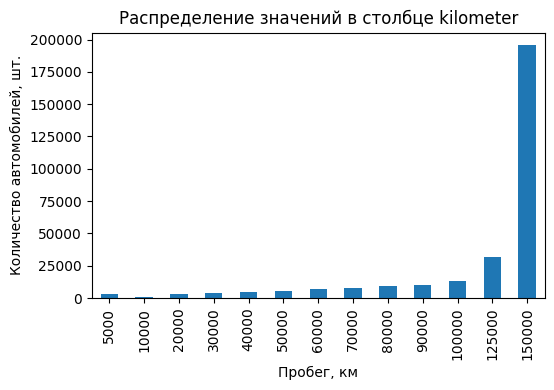

In [38]:
# Оформим название графиков и подписи к осям в словарь

labels_dict2 = {
    'kilometer': ['Распределение значений в столбце kilometer', 'Пробег, км', 'Количество автомобилей, шт.']
}

# Вызов функции для столбиковых диаграмм

plot_bars(df[['kilometer']], labels_dict2)

Пробег автомобилей дискретен (от 5000 до 150000 км) - вероятно, значения были округлены.

Далее для количественных признаков построим диаграммы "ящик с усами".

In [39]:
# Напишем функцию для построения диаграмм "ящик с усами"

def boxplot_numbers(df, labels_dict, nrows=3, ncols=3, figsize=(15, 10)):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()
    
    for i, col in enumerate(labels_dict):
        df[col].plot.box(ax=axes[i])
        
        title, xlabel, ylabel = labels_dict.get(col)
        
        axes[i].set_title(f'Boxplot для столбца {col}')
        axes[i].set_ylabel(xlabel)
        
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)  
        
    plt.tight_layout() 
    plt.show()

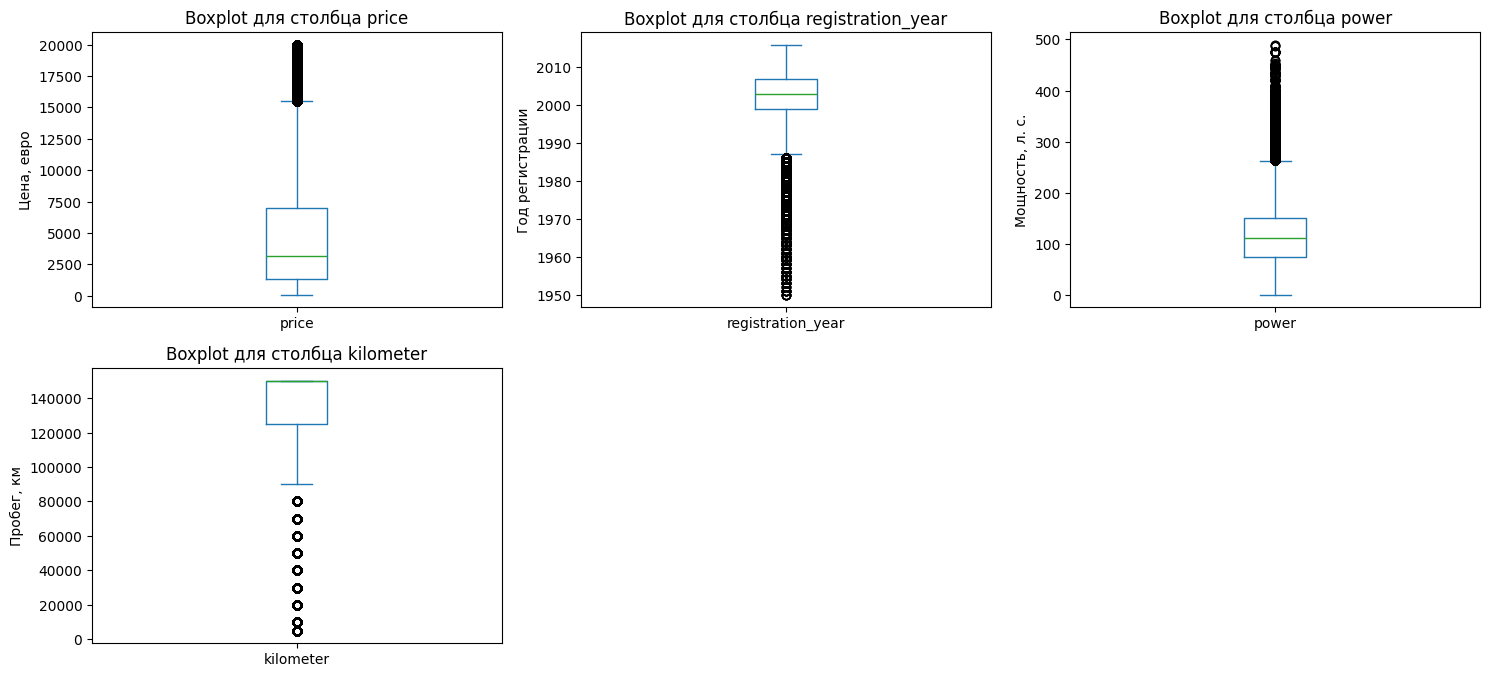

In [40]:
# Вызов функции для построения диаграмм "ящик с усами"

labels_dict_total = labels_dict1 | labels_dict2

boxplot_numbers(df[['price', 'registration_year', 'power', 'kilometer']], labels_dict_total)

Медианная цена автомобилей в сервисе продаж - около 2500 евро, возраст авто - около 13 лет (на 2016 год), мощность - 105 л.с., пробег в основном составляет около 150000 км, т.е. в этом сервисе преимущественно продают машины с большим пробегом.

Несмотря на то что некоторые признаки имеют выбросы, оставим их нетронутыми, поскольку, например, раритетные авто могут стоить дорого, равно как и авто с малым пробегом и с высокой мощностью. Обучение моделей на таких автомобилях важно с точки зрения бизнеса.

**Категориальные признаки**

In [41]:
# Напишем функцию для построения столбцатых диаграмм для вывода процентного соотнощения уникальных категорий в датасете

def plot_categories(df, nrows=2, ncols=2, figsize=(15, 8)):

    cat_cols = df.select_dtypes(include='object').columns
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()
    
    for i, col in enumerate(cat_cols):

        value_counts = df[col].value_counts(normalize=True) * 100
        bars = value_counts.plot.bar(ax=axes[i], rot=0)
        axes[i].set_title(col)
        axes[i].set_ylabel('Процентное соотношение, %', size=12)

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

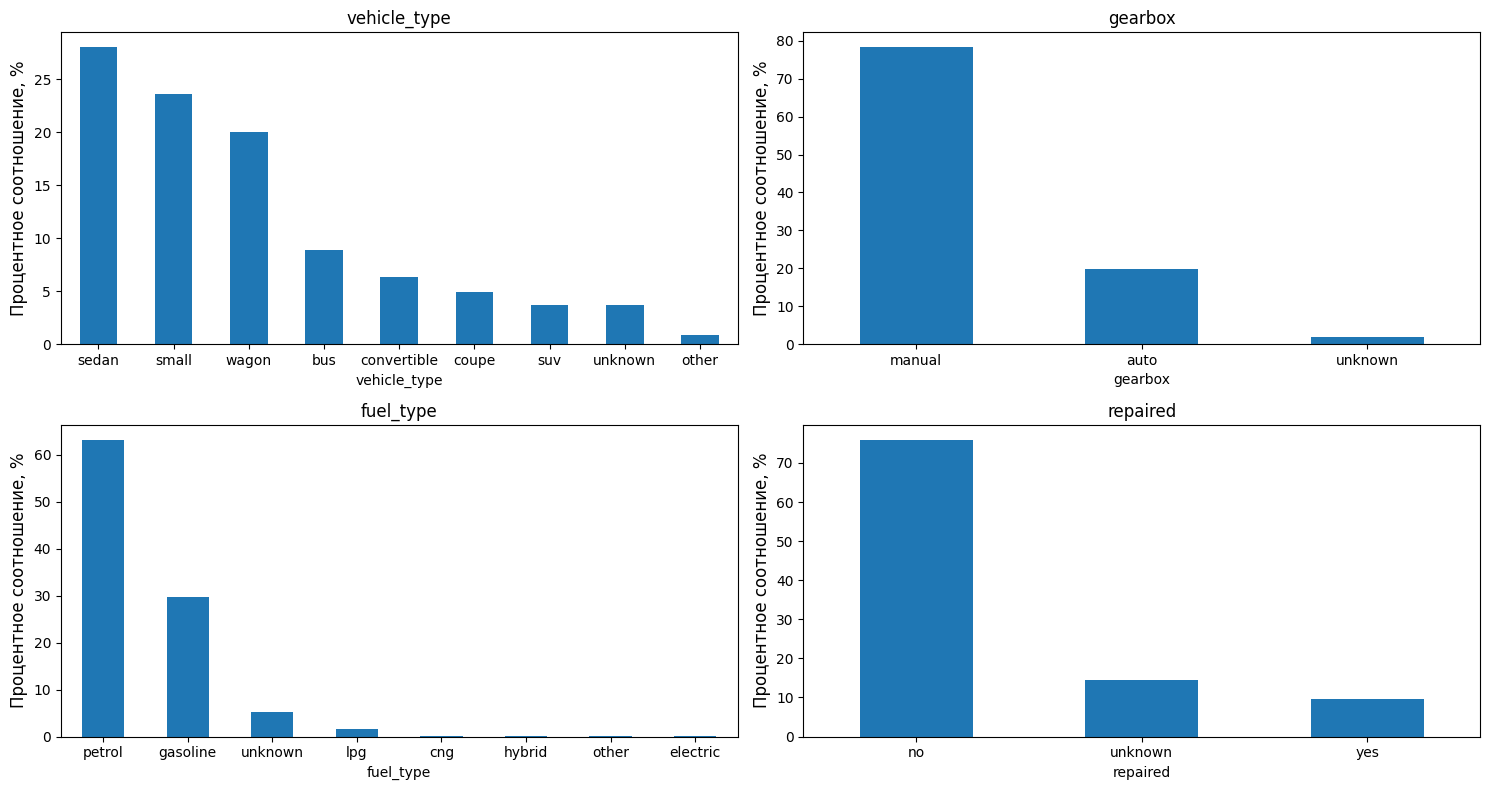

In [42]:
# Вызов функции

plot_categories(df[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

Наиболее распространенный тип автомобилей в сервисе по продажам - это седаны (более 25%), коробка передач - механическая (почти 80%), тип топлива - petrol (более 60 %). Известно, что большинство автомобилей (более 70%) не были в ремонте.

**Корреляционный анализ**

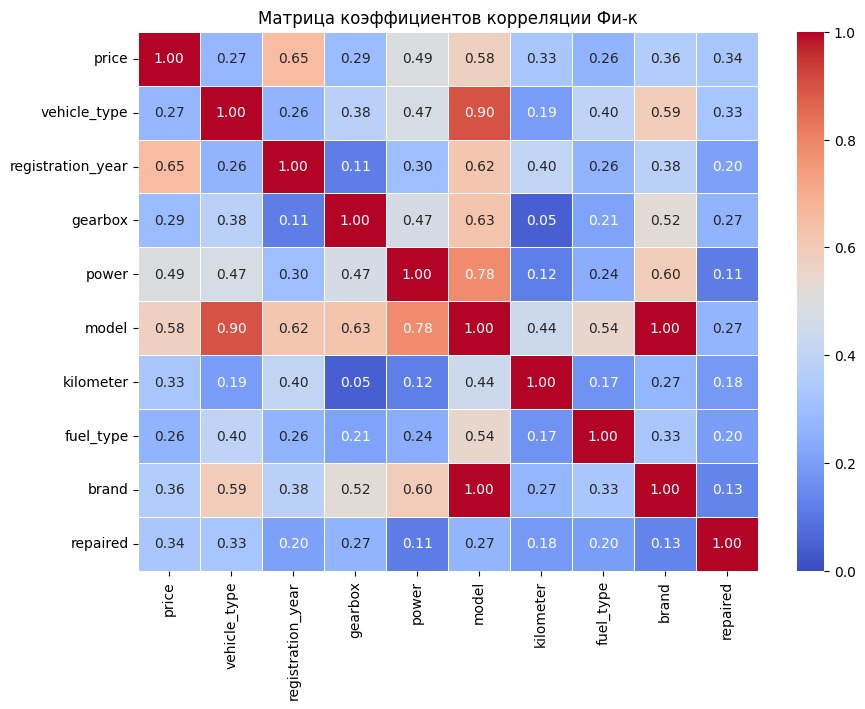

In [43]:
# Вычисляем матрицу phi-k корреляций и визуализируем тепловую карту

selected_cols = ['price', 'registration_year', 'power']

phi_k_matrix = df.phik_matrix(interval_cols=selected_cols)

plt.figure(figsize=(10, 7))
sns.heatmap(phi_k_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5)
plt.title('Матрица коэффициентов корреляции Фи-к')
plt.show()

In [44]:
df.head(10)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,18300,coupe,2011,manual,190,unknown,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,unknown
9,999,small,1998,manual,101,golf,150000,unknown,volkswagen,unknown
10,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
11,2799,wagon,2005,manual,140,passat,150000,gasoline,volkswagen,yes


В датасете присутствует мультиколлинеарность между некоторыми признаками (например, между признаками 'brand' и 'model'), что критично для линейных моделей.

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
<strong>Вывод:
</strong> 
    В разделе был проведен анализ данных. Показано, что присутствуют выбросы и мультиколлинеарность между некоторыми признаками.
    Установлено, что в этом сервисе преимущественно продают машины с большим пробегом и довольно старые. Например, возраст авто - около 17 лет, пробег в основном составляет около 150000 км.

## Обучение моделей

Далее будет решаться задача регрессии (целевой признак: price), где будут использоваться следующие модели машинного обучения:

* Ridge
* RandomForest
* LightGBM
* XGBoost
* CatBoost

В качестве метрики будет использоваться RMSE (целевое значение - не более 2500). С использованием пайплайнов модели будут обучены, для каждой из них будет подобран как минимум один гиперпараметр, и определена лучшая модель на кросс-валидации.

In [45]:
# В функции разделим выборки на тренировочную и тестовую, закодируем категориальные признаки в пайплайне

def prepare_data(df, target_column, test_size=0.25, random_state=42):

    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()
    
    encoder = TargetEncoder(target_type="continuous", cv=5, smooth="auto")
    
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', encoder, cat_cols)], remainder='passthrough')
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test, preprocessor

In [46]:
# Вызов функции

X_train, X_test, y_train, y_test, preprocessor = prepare_data(df, target_column='price')

In [47]:
# Подберем гиперпараметры у моделей

param_grids = [
    {
        'model': [Ridge(random_state=42)],
        'model__alpha': [0.1, 1, 10]
    },
    {
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [50],
        'model__max_depth': [20],
        'model__min_samples_split': [2, 5]
    },
    {
        'model': [lgb.LGBMRegressor(random_state=42)],
        'model__learning_rate': [0.05, 0.1],
        'model__n_estimators': [50],
        'model__num_leaves': [63]
    },
    {
        'model': [XGBRegressor(random_state=42, tree_method="hist")],
        'model__learning_rate': [0.05],
        'model__max_depth': [3]
    },
    {
        'model': [CatBoostRegressor(random_state=42, verbose=0)], 
        'model__depth': [4, 8],
        'model__learning_rate': [0.05, 0.1]
    }
]

In [48]:
# Для каждой из моделей подберем наилучшие гиперпараметры на кросс-валидации

pipe = Pipeline([('preprocessor', preprocessor),
                 ('model', None)])
        
gs = GridSearchCV(estimator=pipe, param_grid=param_grids, cv=3, 
                  scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['registration_year',
                                                                          'power',
                                                                          'kilometer']),
                                                                        ('cat',
                                                                         TargetEncoder(target_type='continuous'),
                                                                         ['vehicle_type',
                                                                          'gearbox',
                                                                          'model',
                                                                          'fuel_type',
                                                                          'brand',
                                                                          'repaired'])])),
                                       ('model', None)]),
             n_jobs=-1,
             param_grid=[{'model': [R...
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...)],
                          'model__learning_rate': [0.05],
                          'model__max_depth': [3]},
                         {'model': [<catboost.core.CatBoostRegressor object at 0x0000024B04767A00>],
                          'model__depth': [4, 8],
                          'model__learning_rate': [0.05, 0.1]}],
             scoring='neg_root_mean_squared_error', verbose=2)

## Анализ моделей

Проанализируем результаты работы модели на тренировочной выборке.

In [49]:
# Создадим датафрейм с основными параметрами обучения моделей

cv_results = pd.DataFrame(gs.cv_results_)
cv_results_need = cv_results.copy()

In [50]:
columns = ['mean_fit_time', 'mean_score_time', 'params']

# Вычисляем среднее по кросс-валидации значение RMSE и его стандартное отклонение
cv_results_need['mean_rmse'] = -cv_results_need['mean_test_score']
cv_results_need['std_rmse'] = cv_results_need['std_test_score']

# Сортируем по RMSE
cv_results_need = cv_results_need.sort_values('mean_rmse').reset_index(drop=True)

# Выведем таблицу с нужными параметрами
display(cv_results_need[columns + ['mean_rmse', 'std_rmse']].head(20))
pd.set_option('display.max_colwidth', 180)

,mean_fit_time,mean_score_time,params,mean_rmse,std_rmse
0,125.127143,0.522661,"{'model': <catboost.core.CatBoostRegressor object at 0x0000024B04767A00>, 'model__depth': 8, 'model__learning_rate': 0.1}",1557.952131,4.352566
1,128.194543,0.452612,"{'model': <catboost.core.CatBoostRegressor object at 0x0000024B04767A00>, 'model__depth': 8, 'model__learning_rate': 0.05}",1577.752302,4.348853
2,41.668882,1.350334,"{'model': RandomForestRegressor(random_state=42), 'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 50}",1579.479891,4.861991
3,44.291739,1.034646,"{'model': RandomForestRegressor(random_state=42), 'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 50}",1580.223394,5.300673
4,103.734222,0.803755,"{'model': <catboost.core.CatBoostRegressor object at 0x0000024B04767A00>, 'model__depth': 4, 'model__learning_rate': 0.1}",1643.778317,8.604627
5,67.683436,1.535208,"{'model': LGBMRegressor(random_state=42), 'model__learning_rate': 0.1, 'model__n_estimators': 50, 'model__num_leaves': 63}",1655.712064,2.258590
6,105.064224,0.741467,"{'model': <catboost.core.CatBoostRegressor object at 0x0000024B04767A00>, 'model__depth': 4, 'model__learning_rate': 0.05}",1677.404124,6.679179
7,67.607105,1.564202,"{'model': LGBMRegressor(random_state=42), 'model__learning_rate': 0.05, 'model__n_estimators': 50, 'model__num_leaves': 63}",1806.828002,3.354192
8,6.079954,0.192363,"{'model': XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=Non...",1942.573446,4.008212
9,2.791950,0.306300,"{'model': Ridge(random_state=42), 'model__alpha': 10}",2747.741369,7.428480


Из таблицы видно, что моделью с наилучшим значением RMSE (1556,8) оказалась модель CatBoostRegressor, при этом ее среднее время обучения на каждом фолде при каждой комбинации гиперпараметров оптимально (около 25 с) при сравнении с другими моделями, равно как и среднее время, затраченное на предсказание и оценку моделей на фолде (0.36 с). На второе и третье место по RMSE (около 1574 - 1578) можно поставить RandomForest со средним временем обучения в диапазоне 24 - 27 с, хотя среднее время оценки модели в случае RandomForest оказывается больше (в интервале 0.95 - 1.12 с) по сравнению с другими представленными моделями. Лучше всех по времени (с обучением около 0.5 с и предсказанием менее 0.3 с) - линейная регрессия с ридж-регуляризацией, однако при выбранных гиперпараметрах у нее наихудший RMSE среди всех моделей, который не проходит установленную верхнюю границу в 2500. XGBoost не прошел процедуру обучения.

In [51]:
# Выведем наилучшие гиперпараметры CatBoostRegressor и RMSE на кросс-валидации

best_model = gs.best_estimator_
print(f"Лучшие параметры: {gs.best_params_}")
print(f"Лучший RMSE на кросс-валидации: {round(-gs.best_score_, 1)}")

Лучшие параметры: {'model': <catboost.core.CatBoostRegressor object at 0x0000024B04767A00>, 'model__depth': 8, 'model__learning_rate': 0.1}
Лучший RMSE на кросс-валидации: 1558.0


Рассмотрим результаты выбранной наилучшей модели на предсказаниях на тестовой выборке

In [52]:
# Измерим время предсказания, рассчитаем RMSE

start_time = time()
y_test_pred = best_model.predict(X_test)
test_time = time() - start_time

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE: {round(test_rmse, 1)}")
print(f"Время предсказания: {round(test_time, 2)} сек")

RMSE: 1544.0
Время предсказания: 0.31 сек


Модель хорошо себя показала на тестовой выборке.

Проверим модель на адекватность, сравнив RMSE модели с RMSE от предсказания средним.

In [53]:
# Выведем значение RMSE от предсказания средним

baseline_rmse = np.sqrt(mean_squared_error(y_test, [np.mean(y_train)] * len(y_test)))
round(baseline_rmse, 1)

np.float64(4617.1)

Построим график важности признаков.

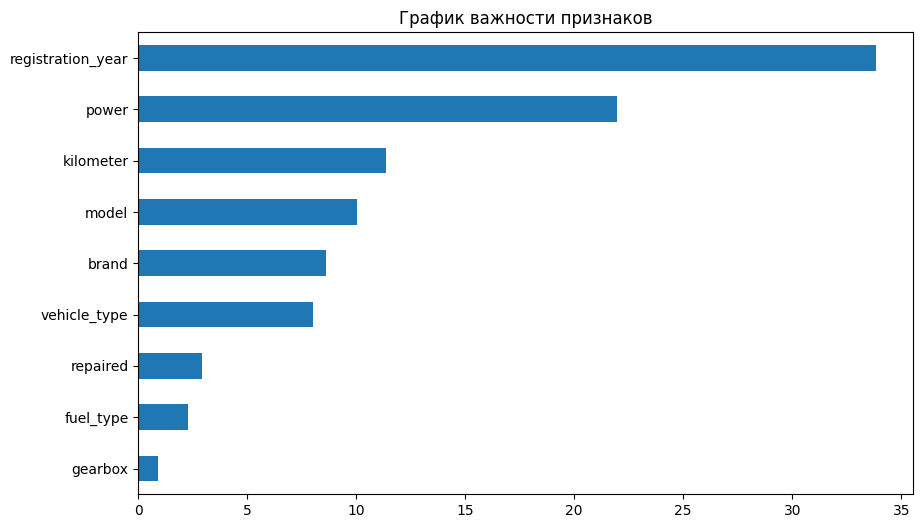

In [54]:
feature_names = [x.split('__')[1] for x in 
                 gs.best_estimator_.named_steps['preprocessor'].get_feature_names_out()]

importances = best_model.named_steps['model'].feature_importances_
pd.Series(importances, index=feature_names).sort_values(ascending=True).plot.barh(figsize=(10, 6))
plt.title('График важности признаков')
plt.show()

Наиболее важными признаками для выбранной наилучшей модели являются год регистрации автомобиля и его мощность. Наименее важные признаки - тип топлива, тип коробки передач и была ли машина в ремонте.

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
<strong>Вывод:
</strong> 
    Проведен анализ моделей. Показано, что наиболее оптимальной моделью с точки зрения метрики RMSE, скорости обучения и скорости предсказания является модель CatBoostRegressor (с выбранными параметрами 'model__depth': 8, 'model__learning_rate': 0.1). Среднее время обучения составило 24.9 с, среднее время, затраченное на предсказание и оценку этой модели, равно 0.36 с, а RMSE равно 1556,8. Время предсказания на тестовой выборке составило 0.34 с, а RMSE равно 1542,7. Наиболее важными признаками для выбранной наилучшей модели являются год регистрации автомобиля и его мощность.

## Общий вывод

1. В работе была произведена предобработка данных, которая включала в себя следующие этапы: переименование столбцов,
обработка дубликатов,
обработка пропусков,
устранение аномальных значений

2. Был проведен анализ данных, анализ распределений значений в признаках, выявление и обработка выбросов.

3. В пайплайне были использованы несколько моделей (Ridge, RandomForest, LightGBM, XGBoost, CatBoost), для которых подобраны гиперпараметры. На кросс-валидации и тестовой выборке определена метрика RMSE, измерено время обучения моделей и время предсказания на тренировочной и тестовой выборках соответственно. Согласно требуемым к моделям критериям, предоставленным заказчиком (с точки зрения качества модели, скорости обучения и скорости предсказания), наилучшей оптимальной моделью оказалась CatBoostRegressor с выбранными параметрами 'model__depth': 8, 'model__learning_rate': 0.1.
4. Наиболее важными признаками для выбранной наилучшей модели являются год регистрации автомобиля и его мощность.

In [55]:
import pickle
# Сохранение модели в формате pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
